In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/train.csv
/kaggle/input/sf-dst-scoring/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

# DATA

In [3]:
# Посмотрим на предоставленные данные
DATA_DIR = '/kaggle/input/sf-dst-scoring/'
df_train = pd.read_csv(DATA_DIR+'/train.csv')
df_test = pd.read_csv(DATA_DIR+'/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [5]:
df_train.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      25905  01FEB2014       SCH   M   62   Y        Y                0   
1      63161  12MAR2014       SCH   F   59   N        N                0   
2      25887  01FEB2014       SCH   M   25   Y        N                2   
3      16222  23JAN2014       SCH   F   53   N        N                0   
4     101655  18APR2014       GRD   M   48   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.008753                1             50             1   
1          0  -1.532276                3             50             2   
2          0  -1.408142                1             80             1   
3          0  -2.057471                2             50             2   
4          1  -1.244723                1             60             2   

   work_address  income  sna  first_time foreign_passport  default  
0             2   18000    4           1                N        0  
1             3   19000    4           1                N        0  
2             2   30000    1           4                Y        0  
3             3   10000    1           3                N        0  
4             3   30000    1           4                Y        0

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [7]:
df_test.head()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
0      74835  22MAR2014       GRD   M   29   Y        Y                0   
1      17527  24JAN2014       SCH   F   39   N        N                5   
2      75683  23MAR2014       UGR   M   50   Y        Y                0   
3      26883  03FEB2014       SCH   M   56   N        N                0   
4      28862  04FEB2014       GRD   F   38   N        N                0   

   good_work  score_bki  bki_request_cnt  region_rating  home_address  \
0          0  -2.271884                3             50             1   
1          0  -1.504999                2             50             1   
2          0  -1.691339                1             50             1   
3          0  -2.374182                1             40             1   
4          0  -2.487502                0             80             2   

   work_address  income  sna  first_time foreign_passport  
0             2   50000    1           4                N  
1             2    5000    4           3                N  
2             2   30000    1           3                Y  
3             2   17000    1           3                N  
4             3  120000    1           3                N

In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


In [9]:
sample_submission.head()

client_id   default
0      66799  0.441004
1      25379  0.138092
2      28825  0.373370
3      37530  0.476501
4       4264  0.304640

In [10]:
#Для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения default, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

Подробнее по признакам:

* client_id - идентификатор клиента
* education - уровень образования
* sex - пол заемщика
* age - возраст заемщика
* car - флаг наличия автомобиля
* car_type - флаг автомобиля иномарки
* decline_app_cnt - количество отказанных прошлых заявок
* good_work - флаг наличия “хорошей” работы
* bki_request_cnt - количество запросов в БКИ
* home_address - категоризатор домашнего адреса
* work_address - категоризатор рабочего адреса
* income - доход заемщика
* foreign_passport - наличие загранпаспорта
* sna - связь заемщика с клиентами банка
* first_time - давность наличия информации о заемщике
* score_bki - скоринговый балл по данным из БКИ
* region_rating - рейтинг региона
* app_date - дата подачи заявки
* default - флаг дефолта по кредиту

# Cleaning data

In [12]:
# Построим на несколько основных графиков с помощью библиотек pandas_profiling
ProfileReport(data)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Еще раз посмотрим на данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [14]:
# Поскольку пустые значения имеет только 'education' рассмотрим его
data.education.value_counts()

SCH    57998
GRD    34768
UGR    14748
PGR     1865
ACD      291
Name: education, dtype: int64

<AxesSubplot:>

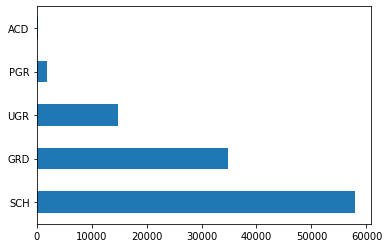

In [15]:
data.education.value_counts().plot.barh()

In [16]:
# Заполним пропуски самыми часто встречающимися значениями в данном случае это 'SCH'
data.education = data.education.fillna('SCH')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         110148 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

# Processing and Analysis

Для наглядности разделим данные по признакам

категориальные = 'education', 'work_address', 'home_address', 'sna', 'first_time'

числовые = 'age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'app_date', 'score_bki', 'region_rating'

бинарные = 'sex', 'car', 'car_type', 'foreign_passport', 'good_work'

In [18]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'first_time']
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'region_rating', 'bki_request_cnt', 'income']

#### Binary types processing

In [19]:
# Переведем бинарные значения в числовые чтобы их можно было обрабатывать
label_encoder = LabelEncoder()

for column in data[['sex', 'car', 'car_type', 'foreign_passport', 'good_work']]:
    data[column] = label_encoder.fit_transform(data[column])
    
# убедимся в преобразовании    
data[bin_cols].head()

sex  car  car_type  foreign_passport  good_work
0    1    1         1                 0          0
1    0    0         0                 0          0
2    1    1         1                 1          0
3    1    0         0                 0          0
4    0    0         0                 0          0

#### Categorical types processing

In [20]:
data[cat_cols].sample(5)

education  home_address  work_address  sna  first_time
67700       SCH             1             1    1           2
58482       UGR             2             3    1           4
9326        SCH             1             2    1           4
48961       SCH             1             2    1           2
62008       GRD             1             2    1           3

In [21]:
# Для дальнеших преобразований приведем стобец education к числовым значениям
edu_label_encoder = LabelEncoder()

data['education'] = edu_label_encoder.fit_transform(data['education'])
data[cat_cols].sample(5)

education  home_address  work_address  sna  first_time
14007          3             2             3    3           1
77822          3             2             3    2           3
12432          1             2             3    4           4
10940          4             2             3    1           3
69617          4             2             3    2           3

#### Data processing

In [22]:
# Столбец app_data приведем его из категориального типа к дате
data.app_date = pd.to_datetime(data.app_date)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         110148 non-null  int64         
 1   app_date          110148 non-null  datetime64[ns]
 2   education         110148 non-null  int64         
 3   sex               110148 non-null  int64         
 4   age               110148 non-null  int64         
 5   car               110148 non-null  int64         
 6   car_type          110148 non-null  int64         
 7   decline_app_cnt   110148 non-null  int64         
 8   good_work         110148 non-null  int64         
 9   score_bki         110148 non-null  float64       
 10  bki_request_cnt   110148 non-null  int64         
 11  region_rating     110148 non-null  int64         
 12  home_address      110148 non-null  int64         
 13  work_address      110148 non-null  int64         
 14  inco

In [24]:
# С помощью даты можно сгенерировать новые признаки такие как день недели и месяц подачи заявки
data["app_day_of_month"] = data.app_date.dt.day
data["app_day_of_week"] = data.app_date.dt.dayofweek
# Добавим новые данные в num_cols
num_cols = ['app_day_of_month', 'app_day_of_week', 'age', 'decline_app_cnt', 'score_bki', 'region_rating', 'bki_request_cnt', 'income']

In [25]:
data.sample()

client_id   app_date  education  sex  age  car  car_type  \
100431      20540 2014-01-28          1    0   27    1         1   

        decline_app_cnt  good_work  score_bki  ...  home_address  \
100431                0          0   -2.21356  ...             1   

        work_address  income  sna  first_time  foreign_passport  sample  \
100431             2   35000    2           3                 1       1   

        default  app_day_of_month  app_day_of_week  
100431        0                28                1  

[1 rows x 22 columns]

#### Numeric types processing

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


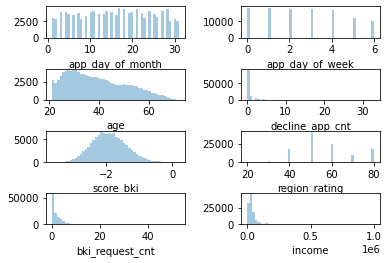

In [26]:
def hist_num():
    i=0
    for c in num_cols:    
        i += 1
        plt.subplot(len(num_cols) / 2 + len(num_cols) % 2 , 2 - len(num_cols) % 2, i)
        sns.distplot(data[c], kde=False, rug=False)
    plt.subplots_adjust(hspace=1, wspace=0.4)
hist_num()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


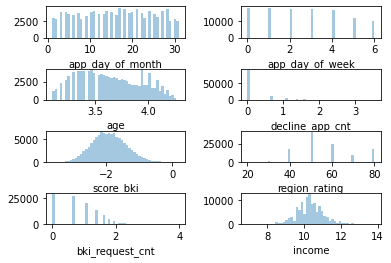

In [27]:
# Для неравномерно распределенных данных применим логарифмическое преобразование
for c in ['age', 'income', 'bki_request_cnt', 'decline_app_cnt']:
    data[c] = np.log(data[c]+1)
hist_num()

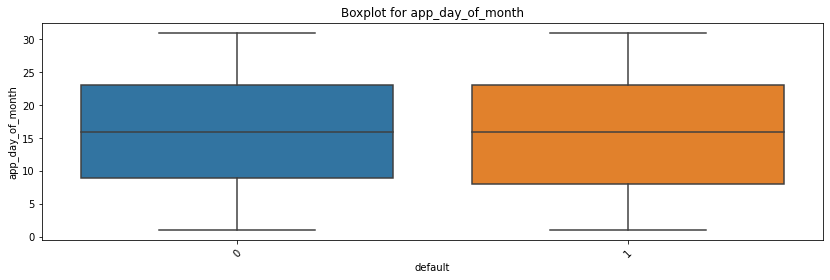

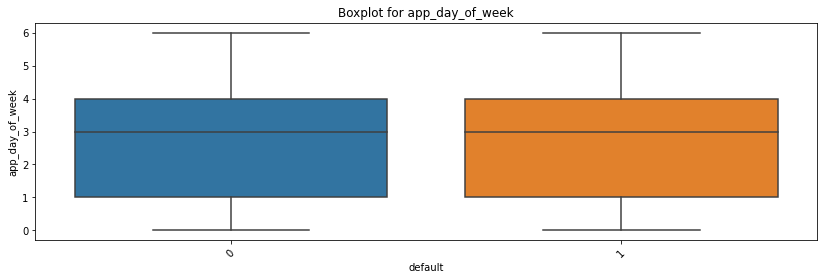

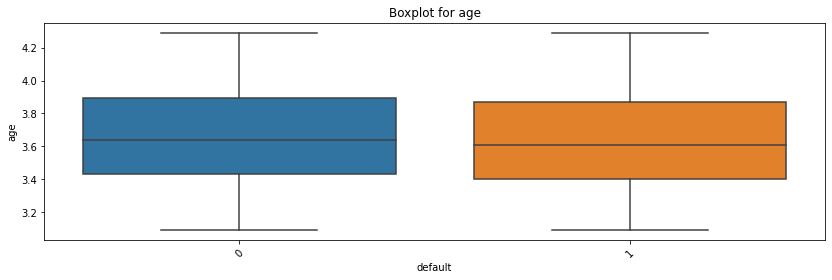

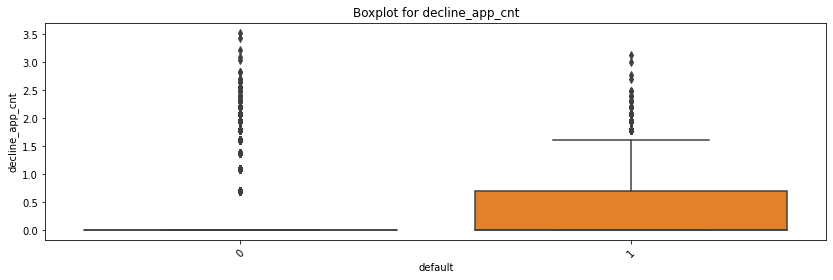

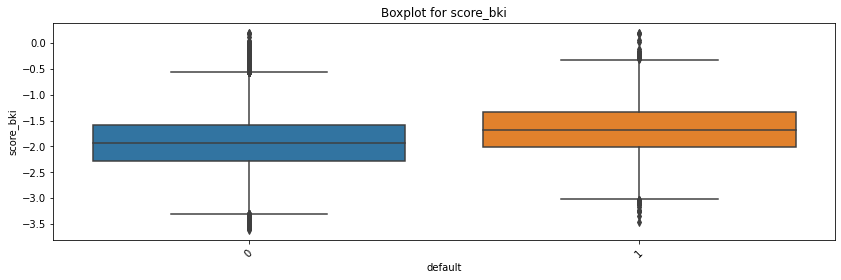

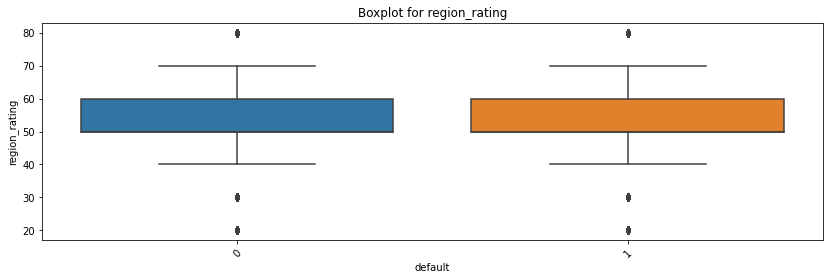

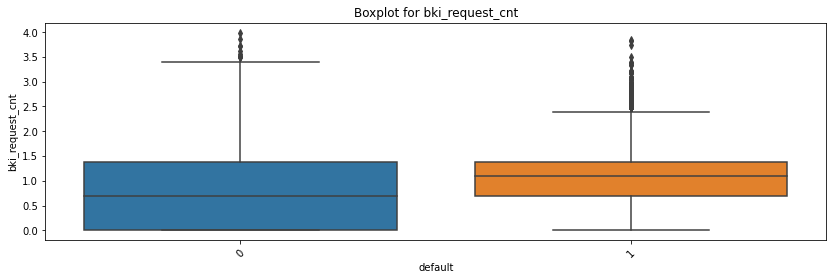

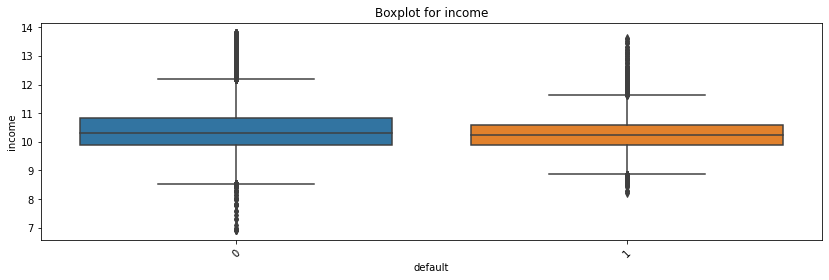

In [28]:
# Построим боксплоты для выявления потенциальных выбросов
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=column, 
                data=data,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for c in num_cols:
    get_boxplot(c)

<AxesSubplot:>

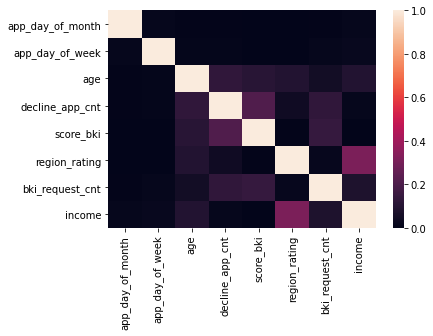

In [29]:
# Так же посмотрим на корреляционную матрицу числовых значений
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

Сильной корреляции меду числовыми значениями нет

<AxesSubplot:>

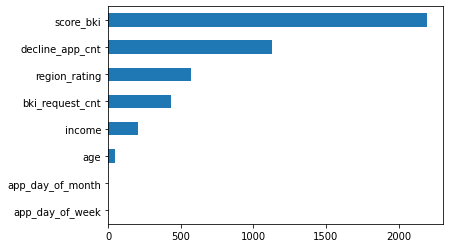

In [30]:
# Посмотрим на значимость признаков
imp_num = pd.Series(f_classif(data[num_cols][data.default>=0], data['default'][data.default>=0])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<AxesSubplot:>

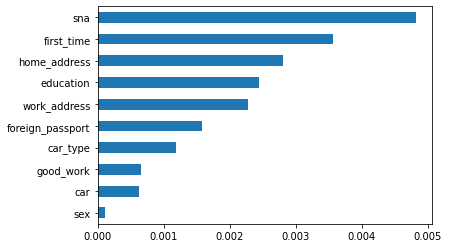

In [31]:
imp_cat = pd.Series(mutual_info_classif(data[bin_cols + cat_cols][data.default>=0], data['default'][data.default>=0],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Model

Разделим обратно на 2 датафрема тестовый и тренировочный

In [32]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73799 entries, 36349 to 110147
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         73799 non-null  int64         
 1   app_date          73799 non-null  datetime64[ns]
 2   education         73799 non-null  int64         
 3   sex               73799 non-null  int64         
 4   age               73799 non-null  float64       
 5   car               73799 non-null  int64         
 6   car_type          73799 non-null  int64         
 7   decline_app_cnt   73799 non-null  float64       
 8   good_work         73799 non-null  int64         
 9   score_bki         73799 non-null  float64       
 10  bki_request_cnt   73799 non-null  float64       
 11  region_rating     73799 non-null  int64         
 12  home_address      73799 non-null  int64         
 13  work_address      73799 non-null  int64         
 14  income           

In [34]:
data["app_day_of_month"] = data.app_date.dt.day
data["app_day_of_week"]

0         5
1         4
2         6
3         0
4         1
         ..
110143    1
110144    0
110145    1
110146    5
110147    3
Name: app_day_of_week, Length: 110148, dtype: int64

In [35]:
# Преобразуем категориальные признаки и нормализуем числовые
# Для train
X_cat = OneHotEncoder(sparse = False).fit_transform(train_data[['education', 'work_address', 'home_address', 'sna', 'first_time']].values)
X_num = StandardScaler().fit_transform(train_data[['app_day_of_month', 'app_day_of_week', 'age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating']].values)
# Для test
X_cat_t = OneHotEncoder(sparse = False).fit_transform(test_data[['education', 'work_address', 'home_address', 'sna', 'first_time']].values)
X_num_t = StandardScaler().fit_transform(test_data[['app_day_of_month', 'app_day_of_week', 'age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'region_rating']].values)

In [36]:
# Тренеруем модель
X = np.hstack([X_num, train_data[['sex', 'car', 'car_type', 'foreign_passport', 'good_work', ]], X_cat])
Y = train_data['default'].values

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [38]:
clf = LogisticRegression()
model = clf.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
roc_curve(Y_train, Y_pred)

(array([0.        , 0.00409756, 1.        ]),
 array([0.      , 0.027833, 1.      ]),
 array([2, 1, 0]))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


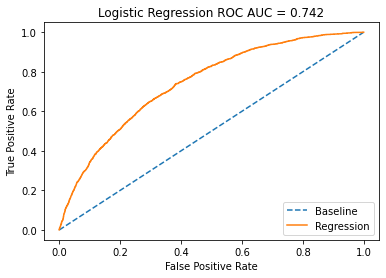

In [40]:
model = LogisticRegression()
model.fit(X_train, Y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(Y_test, probs)
roc_auc = roc_auc_score(Y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Submission

In [41]:
test_data.sample(10)

client_id   app_date  education  sex       age  car  car_type  \
9023       31725 2014-02-07          1    0  3.891820    0         0   
6790       30560 2014-02-06          1    1  4.077537    1         0   
11307        954 2014-01-04          3    0  3.951244    0         0   
18441      22252 2014-01-29          1    1  3.295837    1         1   
3835       77969 2014-03-25          3    0  3.332205    0         0   
15783      86324 2014-04-02          3    1  3.295837    0         0   
25811      33790 2014-02-10          3    0  3.258097    1         0   
30796      68816 2014-03-17          1    1  3.332205    0         0   
2496       98178 2014-04-15          1    1  3.295837    0         0   
6771       53217 2014-03-02          3    0  4.077537    0         0   

       decline_app_cnt  good_work  score_bki  ...  region_rating  \
9023          0.000000          0  -1.863451  ...             50   
6790          0.000000          1  -2.344196  ...             80   
11307         0.693147          0  -1.937486  ...             40   
18441         0.000000          1  -1.456676  ...             60   
3835          0.000000          0  -1.981378  ...             50   
15783         0.000000          0  -1.626587  ...             70   
25811         0.693147          0  -1.868263  ...             50   
30796         0.000000          0  -1.946866  ...             80   
2496          0.693147          1  -1.424929  ...             40   
6771          0.000000          0  -2.126491  ...             40   

       home_address  work_address     income  sna  first_time  \
9023              1             1   9.546884    1           4   
6790              2             3  11.002117    1           2   
11307             1             1   9.903538    1           3   
18441             1             1  10.085851    1           2   
3835              1             3  10.126671    1           3   
15783             2             3  10.819798    4           3   
25811             1             2  10.596660    2           2   
30796             2             3  10.714440    2           3   
2496              2             3  10.126671    1           1   
6771              1             2   9.852247    1           3   

       foreign_passport  default  app_day_of_month  app_day_of_week  
9023                  0        0                 7                4  
6790                  0        0                 6                3  
11307                 0        0                 4                5  
18441                 0        0                29                2  
3835                  1        0                25                1  
15783                 0        0                 2                2  
25811                 1        0                10                0  
30796                 0        0                17                0  
2496                  0        0                15                1  
6771                  0        0                 2                6  

[10 rows x 21 columns]

In [42]:
test_data 

client_id   app_date  education  sex       age  car  car_type  \
0          74835 2014-03-22          1    1  3.401197    1         1   
1          17527 2014-01-24          3    0  3.688879    0         0   
2          75683 2014-03-23          4    1  3.931826    1         1   
3          26883 2014-02-03          3    1  4.043051    0         0   
4          28862 2014-02-04          1    0  3.663562    0         0   
...          ...        ...        ...  ...       ...  ...       ...   
36344      83775 2014-03-31          3    0  3.637586    0         0   
36345     106254 2014-04-25          1    0  4.174387    1         1   
36346      81852 2014-03-30          1    1  3.465736    0         0   
36347       1971 2014-01-07          4    0  3.332205    0         0   
36348      69044 2014-03-17          3    1  3.663562    0         0   

       decline_app_cnt  good_work  score_bki  ...  region_rating  \
0             0.000000          0  -2.271884  ...             50   
1             1.791759          0  -1.504999  ...             50   
2             0.000000          0  -1.691339  ...             50   
3             0.000000          0  -2.374182  ...             40   
4             0.000000          0  -2.487502  ...             80   
...                ...        ...        ...  ...            ...   
36344         0.693147          0  -1.744976  ...             50   
36345         0.000000          0  -2.293781  ...             60   
36346         1.098612          0  -0.940752  ...             50   
36347         0.693147          0  -1.242392  ...             80   
36348         0.000000          0  -1.507549  ...             50   

       home_address  work_address     income  sna  first_time  \
0                 1             2  10.819798    1           4   
1                 1             2   8.517393    4           3   
2                 1             2  10.308986    1           3   
3                 1             2   9.741027    1           3   
4                 2             3  11.695255    1           3   
...             ...           ...        ...  ...         ...   
36344             2             3   9.615872    4           1   
36345             1             2  12.206078    1           4   
36346             1             2  11.002117    4           2   
36347             2             3  10.308986    1           1   
36348             1             2   9.615872    4           2   

       foreign_passport  default  app_day_of_month  app_day_of_week  
0                     0        0                22                5  
1                     0        0                24                4  
2                     1        0                23                6  
3                     0        0                 3                0  
4                     0        0                 4                1  
...                 ...      ...               ...              ...  
36344                 0        0                31                0  
36345                 0        0                25                4  
36346                 0        0                30                6  
36347                 0        0                 7                1  
36348                 0        0                17                0  

[36349 rows x 21 columns]

In [43]:
test_data = test_data.drop(['default'], axis=1)

In [44]:
sample_submission

client_id   default
0          66799  0.441004
1          25379  0.138092
2          28825  0.373370
3          37530  0.476501
4           4264  0.304640
...          ...       ...
24349      96657  0.144776
24350      65908  0.878936
24351      74542  0.830871
24352      82350  0.371539
24353      27866  0.271120

[24354 rows x 2 columns]

In [45]:
X_test = np.hstack([X_num_t, test_data[['sex', 'car', 'car_type', 'foreign_passport', 'good_work', ]], X_cat_t])

In [46]:
X_test

array([[ 0.70505969,  1.22483299, -0.88333898, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.93790799,  0.69732761,  0.12606863, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82148384,  1.75233837,  0.97850869, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.63645287,  1.75233837, -0.65688874, ...,  1.        ,
         0.        ,  0.        ],
       [-1.04130252, -0.88518854, -1.12541848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12293895, -1.41269392,  0.0372345 , ...,  1.        ,
         0.        ,  0.        ]])

In [47]:
y = model.predict_proba(X_test)
y = y[:,1]

In [48]:
submit = pd.DataFrame(test_data.client_id)

In [49]:
submit

client_id
0          74835
1          17527
2          75683
3          26883
4          28862
...          ...
36344      83775
36345     106254
36346      81852
36347       1971
36348      69044

[36349 rows x 1 columns]

In [50]:
submit['default'] = y

In [51]:
submit.to_csv('submission.csv', index=False)